# Separate countries from regions

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import os

In [4]:
pd.options.display.float_format = '{:,.0f}'.format

In [5]:
def iterate_over_files(root_folder):
    my_listf = []
    for subdir, dirs, files in os.walk(root_folder):
        for file in files:
            full_path = os.path.join(subdir, file)
            if ('Metadata' in full_path):
                pass
            elif  (full_path == '..\\DataSetsBancoMundial\\country_codes\\country_codes.csv'):
                pass
            else:
                my_listf.append(full_path)
                
    return my_listf         

In [6]:
list_paths = iterate_over_files('..\\DataSetsBancoMundial')

In [7]:
list_paths 

['..\\DataSetsBancoMundial\\demographic\\population.csv',
 '..\\DataSetsBancoMundial\\net_migration\\net_migration.csv']

In [8]:
path = list_paths[1]

In [9]:
def load_data(a_path):
    data = pd.read_csv(a_path, skiprows = 3)
    return data

In [10]:
df = load_data(path)

In [11]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Net migration,SM.POP.NETM,0,-569,-609,-646,-684,-726,...,134,88,177,170,218,367,412,0,501,NaN
1,Africa Eastern and Southern,AFE,Net migration,SM.POP.NETM,"-90,849","-1,348","-24,259","-16,266","37,452","11,041",...,"-92,842","-199,608","394,925","-864,708","-343,075","-366,105","-187,410","-48,955","-179,444",NaN
2,Afghanistan,AFG,Net migration,SM.POP.NETM,"2,606","6,109","7,016","6,681","7,079","10,695",...,"48,076","255,611","-281,739","-90,238","-47,090","-47,205","-8,082","166,821","-183,672",NaN
3,Africa Western and Central,AFW,Net migration,SM.POP.NETM,-847,"-41,547","-36,399","-37,435","-45,534","-15,985",...,"-377,305","-280,418","-360,393","-167,286","-200,823","-255,888","-328,552","-99,761","-264,802",NaN
4,Angola,AGO,Net migration,SM.POP.NETM,"-43,749","-49,186","-54,566","-59,777","-71,948","-87,288",...,"91,528","84,532","74,170","91,623","77,733","61,632","58,986","7,557","29,089",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Net migration,SM.POP.NETM,"-6,603","-6,713","-7,466","-7,874","-8,266","-8,573",...,"-40,468","-56,637","-14,819","-31,383","-33,495","-34,137","-33,469","-15,050","-15,050",NaN
262,"Yemen, Rep.",YEM,Net migration,SM.POP.NETM,"-17,145","-17,494","-17,846","-18,217","-18,583","-18,968",...,"-23,747","-30,048","-38,355","-39,688","-39,672","-39,699","-39,769","-86,100","-101,468",NaN
263,South Africa,ZAF,Net migration,SM.POP.NETM,"18,909","56,098","68,068","70,976","74,419","80,687",...,"63,794","290,874","644,996","-866,101","-10,681","27,265","22,728","30,852","10,934",NaN
264,Zambia,ZMB,Net migration,SM.POP.NETM,"-3,894","-4,357","-4,756","-5,029","-5,214","-5,370",...,"15,574","16,580","16,283","17,285","20,268","18,019","18,019","9,015","9,015",NaN


####  Cut down the years we won't use

In [12]:
df.drop(df.iloc[:, 3:34],axis = 1, inplace= True)

<AxesSubplot: >

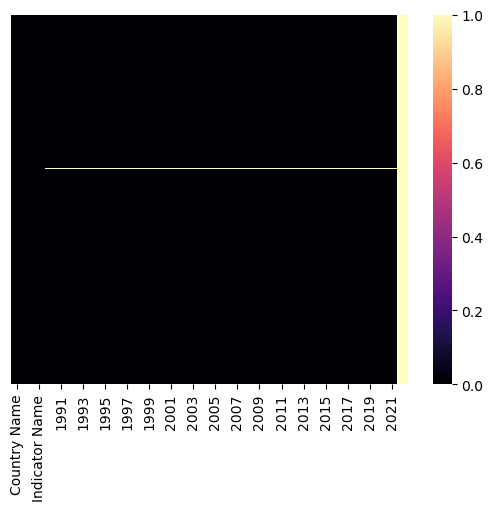

In [13]:
sns.heatmap(df.isna(),yticklabels=False,cmap = "magma")

In [14]:
#df

In [15]:
df.drop(columns = ['Unnamed: 66', '2021'], inplace = True)

In [16]:
df = df[df['Country Name'] != 'Not classified'].reset_index(drop = True) 

In [17]:
df.isna().any().any()

False

In [18]:
df.isna().mean()*100

Country Name     0
Country Code     0
Indicator Name   0
1990             0
1991             0
1992             0
1993             0
1994             0
1995             0
1996             0
1997             0
1998             0
1999             0
2000             0
2001             0
2002             0
2003             0
2004             0
2005             0
2006             0
2007             0
2008             0
2009             0
2010             0
2011             0
2012             0
2013             0
2014             0
2015             0
2016             0
2017             0
2018             0
2019             0
2020             0
dtype: float64

In [19]:
def normalize_columns_names(data):
    
    data.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
        
    return data

In [20]:
df = normalize_columns_names(df)

In [21]:
df.head()

,country_name,country_code,indicator_name,1990,1991,1992,1993,1994,1995,1996,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Net migration,879,"1,946","1,294","1,662","1,668","1,598","1,636",...,315,229,134,88,177,170,218,367,412,0
1,Africa Eastern and Southern,AFE,Net migration,"22,815","-511,160","-556,663","-156,997","-391,945","-243,945","-427,138",...,"-683,611","-285,231","-92,842","-199,608","394,925","-864,708","-343,075","-366,105","-187,410","-48,955"
2,Afghanistan,AFG,Net migration,"-666,001","39,926","1,834,556","1,171,818","665,410","71,824","27,194",...,"418,796","105,905","48,076","255,611","-281,739","-90,238","-47,090","-47,205","-8,082","166,821"
3,Africa Western and Central,AFW,Net migration,"-529,414","-101,888","-72,380","-345,858","-198,790","10,350","-188,064",...,"-198,802","-435,876","-377,305","-280,418","-360,393","-167,286","-200,823","-255,888","-328,552","-99,761"
4,Angola,AGO,Net migration,"47,663","33,925","39,196","38,883","45,272","40,855","45,356",...,"94,709","96,056","91,528","84,532","74,170","91,623","77,733","61,632","58,986","7,557"


### Normalize data

#### Change data type in year columns

In [22]:
for column in df.iloc[:, 3:34]:
    df[column].astype(float)

In [24]:
df.indicator_name = df.indicator_name.apply(lambda x: x.lower().replace(' ', '_').strip())

#### The indicator name below should be changed for each different file processed

In [25]:
#df.indicator_name = 'population'

In [27]:
for column in df.iloc[:, :2]:
    df[column] = df[column].apply(lambda x: x.upper().strip())

### Now, let's identify the year columns with the corresponding indicator name

In [28]:
indicator_name = df.indicator_name.unique()[0]

In [29]:
for column in df.iloc[:, 3:34]:
    df.rename(columns={column: f'{indicator_name}_{column}' }, inplace = True)

In [31]:
df.drop(columns = 'indicator_name', inplace = True)

In [32]:
df.rename(columns = {'country_name	':'country_name'}, inplace = True)

#### Now we can separate the countries from the regions

In [33]:
region = ['AFRICA EASTERN AND SOUTHERN', 'AFRICA WESTERN AND CENTRAL', 'EAST ASIA & PACIFIC', 'EUROPE & CENTRAL ASIA',
          'LATIN AMERICA & CARIBBEAN', 'MIDDLE EAST & NORTH AFRICA', 'NORTH AMERICA', 'SOUTH ASIA', 'SUB-SAHARAN AFRICA',
          'WORLD']

In [34]:
income_levels =['HIGH INCOME', 'LOW & MIDDLE INCOME', 'LOW INCOME', 'LOWER MIDDLE INCOME', 'MIDDLE INCOME',
                'UPPER MIDDLE INCOME','WORLD']


In [35]:
dividends = ['POST-DEMOGRAPHIC DIVIDEND', 'PRE-DEMOGRAPHIC DIVIDEND', 'EARLY-DEMOGRAPHIC DIVIDEND','LATE-DEMOGRAPHIC DIVIDEND']

In [36]:
lending_groups =['IBRD ONLY', 'IDA BLEND', 'IDA & IBRD TOTAL', 'IDA ONLY', 'IDA TOTAL',
                 'EAST ASIA & PACIFIC (IDA & IBRD COUNTRIES)', 'EUROPE & CENTRAL ASIA (IDA & IBRD COUNTRIES)',
                 'LATIN AMERICA & THE CARIBBEAN (IDA & IBRD COUNTRIES)', 'MIDDLE EAST & NORTH AFRICA (IDA & IBRD COUNTRIES)',
                 'SOUTH ASIA (IDA & IBRD)', 'SUB-SAHARAN AFRICA (IDA & IBRD COUNTRIES)','WORLD']

In [37]:
small_states= ['CARIBBEAN SMALL STATES', 'OTHER SMALL STATES', 'PACIFIC ISLAND SMALL STATES', 'SMALL STATES','WORLD']

In [38]:
other_groups=['ARAB WORLD', 'CENTRAL EUROPE AND THE BALTICS', 'EAST ASIA & PACIFIC (EXCLUDING HIGH INCOME)',
              'EURO AREA', 'EUROPE & CENTRAL ASIA (EXCLUDING HIGH INCOME)', 'EUROPEAN UNION',
              'FRAGILE AND CONFLICT AFFECTED SITUATIONS', 'HEAVILY INDEBTED POOR COUNTRIES (HIPC)',
              'LATIN AMERICA & CARIBBEAN (EXCLUDING HIGH INCOME)', 'LEAST DEVELOPED COUNTRIES: UN CLASSIFICATION',
              'MIDDLE EAST & NORTH AFRICA (EXCLUDING HIGH INCOME)', 'OECD MEMBERS',
              'SUB-SAHARAN AFRICA (EXCLUDING HIGH INCOME)', 'WORLD']

In [39]:
len(other_groups)

14

In [40]:
# Create the subfolders to store the new datasets
regions = ['region', 'income_levels', 'lending_groups', 'small_states', 'other_groups', 'dividends']
new_path = '..\\DataSets\\BM\\'

for reg in regions:
    os.makedirs(new_path + reg, exist_ok=True)
    
os.makedirs(new_path + 'countries', exist_ok=True)    

In [41]:
filtered = df[df['country_name'].isin(region)]
filtered.to_csv(f'..\\DataSets\\BM\\region\\region_{indicator_name}.csv', index = False)

In [42]:
filtered = df[df['country_name'].isin(income_levels)]
filtered.to_csv(f'..\\DataSets\\BM\\income_levels\\income_levels_{indicator_name}.csv', index = False)

In [43]:
filtered = df[df['country_name'].isin(dividends)]
filtered.to_csv(f'..\\DataSets\\BM\\dividends\\dividends_{indicator_name}.csv', index = False)

In [44]:
filtered = df[df['country_name'].isin(lending_groups)]
filtered.to_csv(f'..\\DataSets\\BM\\lending_groups\\lending_groups_{indicator_name}.csv', index = False)

In [45]:
filtered = df[df['country_name'].isin(small_states)]
filtered.to_csv(f'..\\DataSets\\BM\\small_states\\small_states_{indicator_name}.csv', index = False)

In [46]:
filtered = df[df['country_name'].isin(other_groups)]
filtered.to_csv(f'..\\DataSets\\BM\\other_groups\\other_groups_{indicator_name}.csv', index = False)

In [47]:
df = df[df['country_name'].isin(region) == False]
df= df[df['country_name'].isin(income_levels)== False]
df= df[df['country_name'].isin(dividends)== False]
df = df[df['country_name'].isin(lending_groups)== False]
df = df[df['country_name'].isin(small_states)== False]
df = df[df['country_name'].isin(other_groups) == False]

In [49]:
df.to_csv(f'..\\DataSets\\BM\\countries\\countries_{indicator_name}.csv', index = False)

In [52]:
#pd.read_csv(f'..\\DataSets\\BM\\region\\region_{indicator_name}.csv')    

In [53]:
#pd.read_csv(f'..\\DataSets\\BM\\countries\\countries_{indicator_name}.csv')  